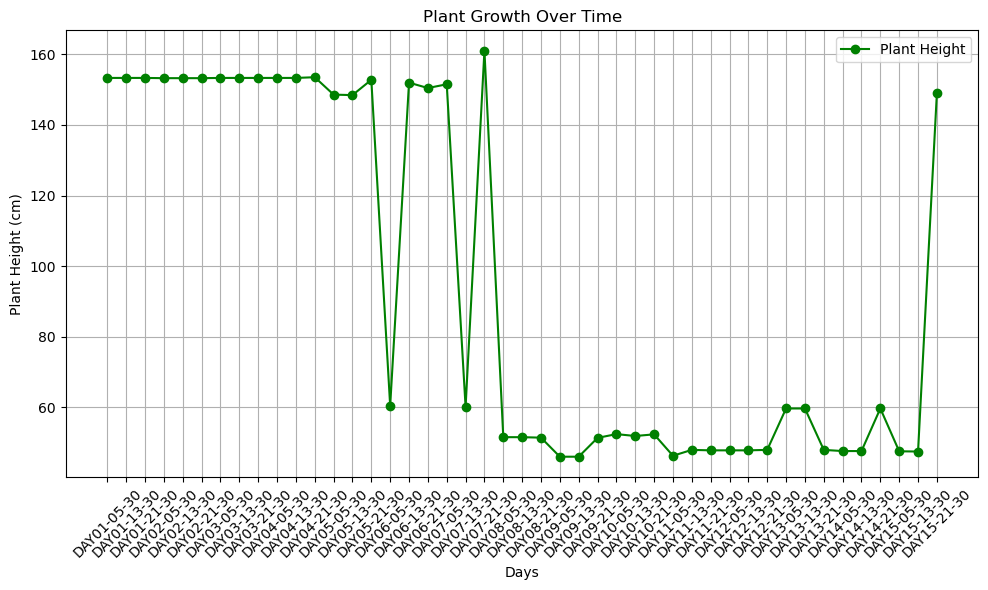

DAY01-05-30: 153.33 cm - Healthy (Initial)
DAY01-13-30: 153.33 cm - Stunted Growth
DAY01-21-30: 153.33 cm - Stunted Growth
DAY02-05-30: 153.27 cm - Stunted Growth
DAY02-13-30: 153.27 cm - Stunted Growth
DAY02-21-30: 153.27 cm - Stunted Growth
DAY03-05-30: 153.33 cm - Stunted Growth
DAY03-13-30: 153.33 cm - Stunted Growth
DAY03-21-30: 153.33 cm - Stunted Growth
DAY04-05-30: 153.33 cm - Stunted Growth
DAY04-13-30: 153.33 cm - Stunted Growth
DAY04-21-30: 153.53 cm - Stunted Growth
DAY05-05-30: 148.60 cm - Wilting/Shrinking
DAY05-13-30: 148.47 cm - Stunted Growth
DAY05-21-30: 152.80 cm - Healthy
DAY06-05-30: 60.40 cm - Wilting/Shrinking
DAY06-13-30: 152.00 cm - Healthy
DAY06-21-30: 150.47 cm - Wilting/Shrinking
DAY07-05-30: 151.53 cm - Healthy
DAY07-13-30: 60.13 cm - Wilting/Shrinking
DAY07-21-30: 161.07 cm - Healthy
DAY08-05-30: 51.53 cm - Wilting/Shrinking
DAY08-13-30: 51.53 cm - Stunted Growth
DAY08-21-30: 51.40 cm - Stunted Growth
DAY09-05-30: 46.00 cm - Wilting/Shrinking
DAY09-13-30: 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def measure_plant_height(image_path, known_pot_height_cm, known_pot_height_px):
   
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Thresholding to create a binary mask
    _, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return None 
    
    # Get the largest contour (assumed to be the plant)
    plant_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding box
    _, y, _, h = cv2.boundingRect(plant_contour)
    
    # Convert pixel height to cm
    pixel_to_cm_ratio = known_pot_height_cm / known_pot_height_px
    plant_height_cm = h * pixel_to_cm_ratio
    
    return plant_height_cm

def assess_health_condition(heights):
    health_conditions = []
    
    for i in range(len(heights)):
        if i == 0:
            health_conditions.append("Healthy (Initial)")
        else:
            growth_rate = heights[i] - heights[i-1]
            
            if growth_rate > 1:
                health_conditions.append("Healthy")
            elif 0.2 <= growth_rate <= 1:
                health_conditions.append("Slow Growth")
            elif -0.5 < growth_rate < 0.2:
                health_conditions.append("Stunted Growth")
            else:
                health_conditions.append("Wilting/Shrinking")
    
    return health_conditions

image_folder = 'INPUT1'  
image_filenames = sorted(os.listdir(image_folder))  


known_pot_height_cm = 10  # Adjust based on actual pot height
known_pot_height_px = 150  # Adjust based on measured pixels in an image

# Prepare lists to store heights and days
plant_heights = []
days = []

# Process each image
for image_filename in image_filenames:
    image_path = os.path.join(image_folder, image_filename)
    day = image_filename.split('.')[0] 

   
    height = measure_plant_height(image_path, known_pot_height_cm, known_pot_height_px)
    
    if height is not None:
        plant_heights.append(height)
        days.append(day)


health_conditions = assess_health_condition(plant_heights)


plt.figure(figsize=(10, 6))
plt.plot(days, plant_heights, marker='o', linestyle='-', color='g', label='Plant Height')
plt.xlabel('Days')
plt.ylabel('Plant Height (cm)')
plt.title('Plant Growth Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


for day, height, condition in zip(days, plant_heights, health_conditions):
    print(f"{day}: {height:.2f} cm - {condition}")
